In [1]:
versioninfo()

Julia Version 1.5.3
Commit 788b2c77c1 (2020-11-09 13:37 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: Intel(R) Core(TM) i7-8700 CPU @ 3.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-9.0.1 (ORCJIT, skylake)


In [2]:
using DiffusionMoments

using CSV
using DataFrames
using PyPlot

┌ Info: Precompiling DiffusionMoments [241a5347-e184-4f02-9eba-4187e55ac6d9]
└ @ Base loading.jl:1278


In [3]:
df = CSV.read(".\\sample.csv");

In [4]:
tamsd = time_average_msd(df, :id, :x, :y)

,TrackID,msd,delta_t,n
,Int64,Float64,Int64,Int64
1,1,0.0220431,1,100
2,1,0.0448484,2,99
3,1,0.0655636,3,98
4,1,0.0848266,4,97
5,1,0.107986,5,96
6,1,0.125634,6,95
7,1,0.139175,7,94
8,1,0.158014,8,93
9,1,0.178096,9,92


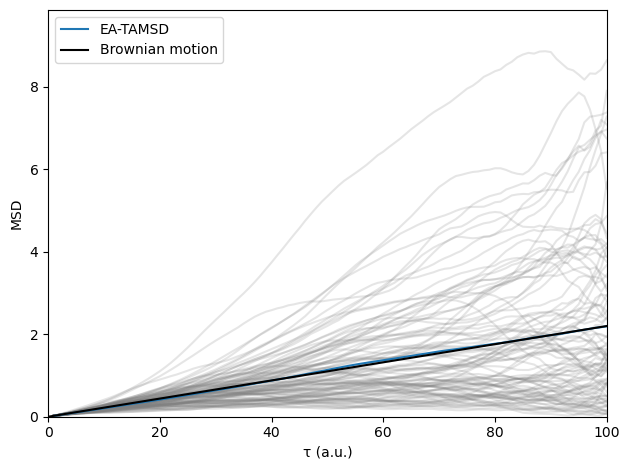

PyObject <matplotlib.legend.Legend object at 0x0000000001331D60>

In [14]:
fig = plt.figure(tight_layout=true)
ax1 = fig.add_subplot(
        111, ylabel="MSD", xlabel="τ (a.u.)",
        xlim=(0, maximum(tamsd.delta_t)), ylim=(0, maximum(tamsd.msd)+1), 
    )

for i = minimum(tamsd.TrackID):maximum(tamsd.TrackID)
    plot(tamsd[tamsd.TrackID .== i, :delta_t], tamsd[tamsd.TrackID .== i, :msd], color="gray", alpha=0.2)
end
plot(eatamsd.delta_t, eatamsd.msd, label="EA-TAMSD")
plot(0:maximum(eatamsd.delta_t), collect(0:maximum(eatamsd.delta_t)).*0.022, color="k", label="Brownian motion")
legend()

In [6]:
eatamsd = ensemble_tamsd(tamsd)

,delta_t,msd,n,std,sem,ci
,Float64,Float64,Int64,Float64,Float64,Float64
1,1.0,0.0205612,10000,0.00200273,0.000200273,0.000392534
2,2.0,0.041243,9900,0.00514355,0.000514355,0.00100814
3,3.0,0.0620727,9800,0.00939841,0.000939841,0.00184209
4,4.0,0.0826065,9700,0.0143126,0.00143126,0.00280526
5,5.0,0.103103,9600,0.0203024,0.00203024,0.00397927
6,6.0,0.123526,9500,0.0266912,0.00266912,0.00523147
7,7.0,0.144219,9400,0.0339181,0.00339181,0.00664795
8,8.0,0.164987,9300,0.0419905,0.00419905,0.00823013
9,9.0,0.18592,9200,0.0502911,0.00502911,0.00985705


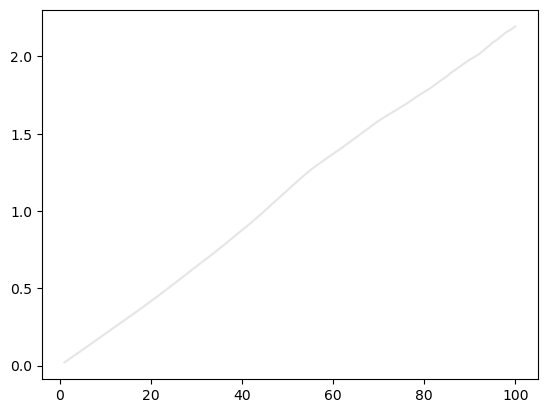

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000005F924C10>

In [7]:
plot(eatamsd.delta_t, eatamsd.msd, color="gray", alpha=0.2)